# Project Name: Salary Predictions of Data Professions

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the dataset
df = pd.read_csv('Salary Prediction of Data Professions.csv')
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


# Checking the Null values and duplicate values and removing them

In [3]:
df.shape

(2639, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [5]:
# Check for null values in each column
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64


In [6]:
# Drop rows with any missing values
df = df.dropna()

In [7]:
# Get summary statistics for numerical columns
summary_stats = df.describe()
print("Summary statistics for numerical columns:\n", summary_stats)


Summary statistics for numerical columns:
                AGE         SALARY  LEAVES USED  LEAVES REMAINING      RATINGS  \
count  2631.000000    2631.000000  2631.000000       2631.000000  2631.000000   
mean     24.754846   58117.644242    22.498670          7.501330     3.486507   
std       3.904705   36867.732515     4.603014          4.603014     1.114248   
min      21.000000   40001.000000    15.000000          0.000000     2.000000   
25%      22.000000   43418.000000    19.000000          4.000000     2.000000   
50%      24.000000   46783.000000    22.000000          8.000000     3.000000   
75%      25.000000   51401.500000    26.000000         11.000000     4.000000   
max      45.000000  388112.000000    30.000000         15.000000     5.000000   

          PAST EXP  
count  2631.000000  
mean      1.562904  
std       2.725973  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max      23.000000  


In [8]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 161


In [9]:
# Remove duplicate rows
df = df.drop_duplicates()

In [10]:
df.shape

(2470, 13)

# Exploratory data analysis

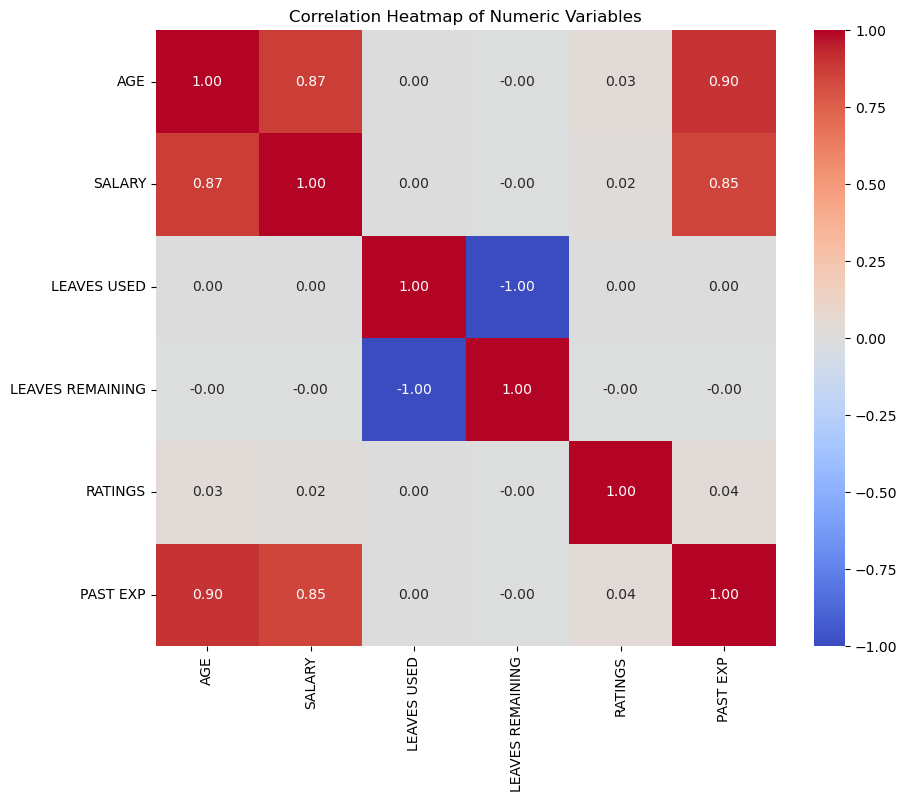

In [11]:
# Calculate correlation matrix
corr_matrix = df[['AGE', 'SALARY', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


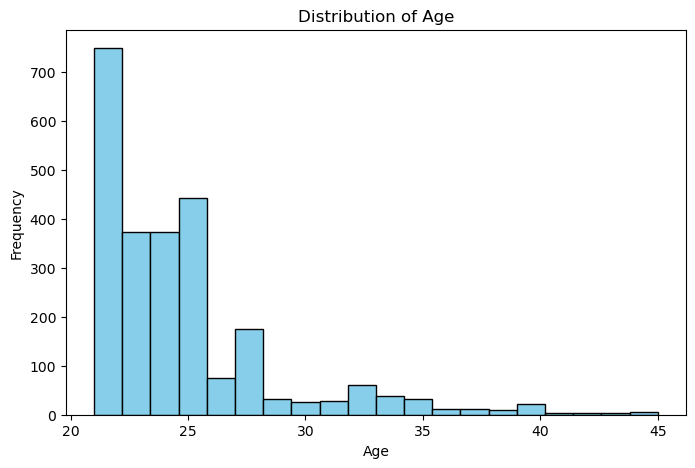

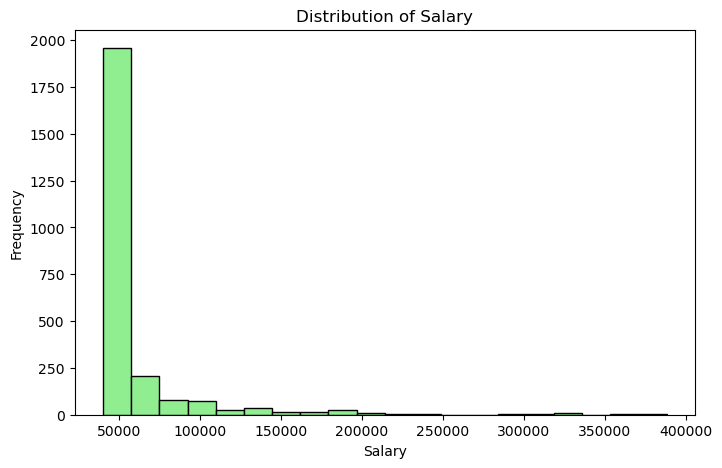

In [12]:
import matplotlib.pyplot as plt

# Histogram of Age
plt.figure(figsize=(8, 5))
plt.hist(df['AGE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram of Salary
plt.figure(figsize=(8, 5))
plt.hist(df['SALARY'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


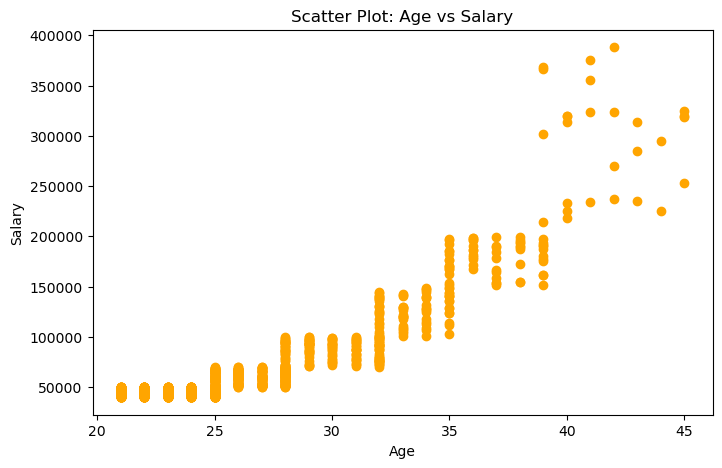

In [13]:
# Scatter plot between Age and Salary
plt.figure(figsize=(8, 5))
plt.scatter(df['AGE'], df['SALARY'], color='orange')
plt.title('Scatter Plot: Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


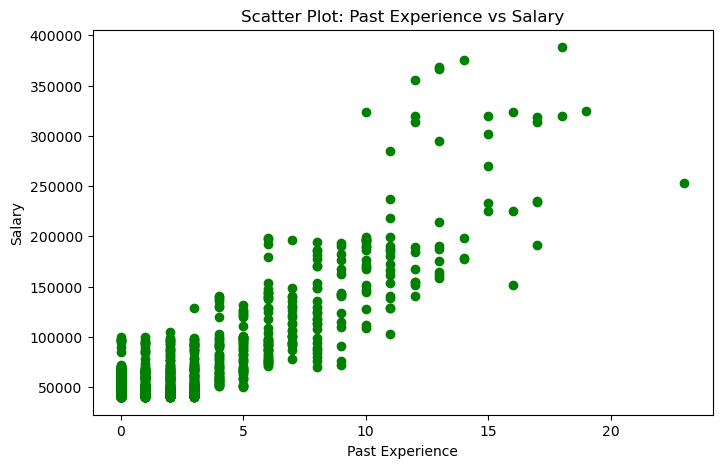

In [14]:
# Scatter plot between Past Experience and Salary
plt.figure(figsize=(8, 5))
plt.scatter(df['PAST EXP'], df['SALARY'], color='green')
plt.title('Scatter Plot: Past Experience vs Salary')
plt.xlabel('Past Experience')
plt.ylabel('Salary')
plt.show()


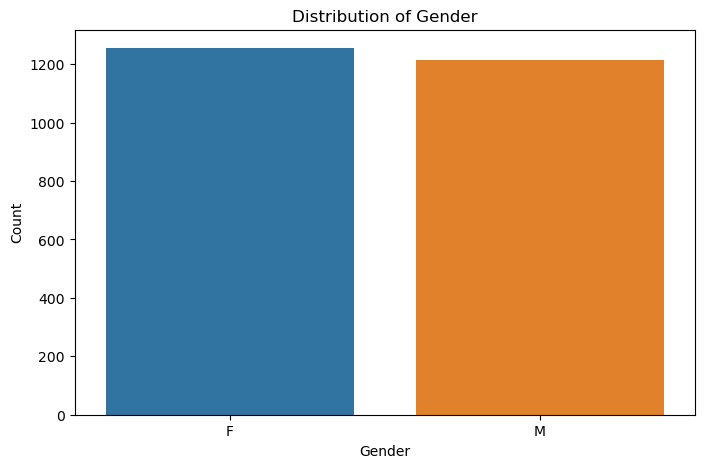

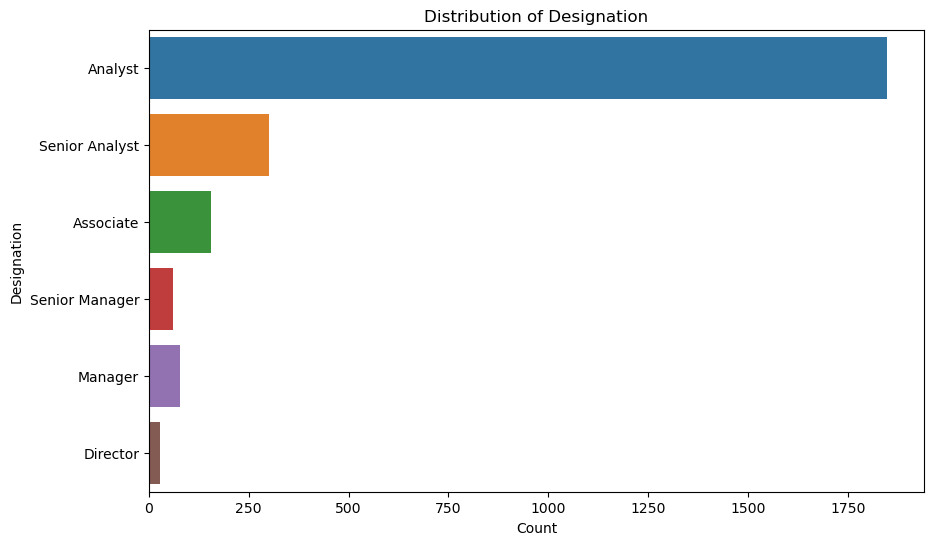

In [15]:
import seaborn as sns

# Bar plot of Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SEX')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bar plot of Designation
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='DESIGNATION')
plt.title('Distribution of Designation')
plt.xlabel('Count')
plt.ylabel('Designation')
plt.show()


# Creating new Features

In [16]:
# Convert 'DOJ' and 'CURRENT DATE' columns to datetime
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])


In [17]:
# Calculate total experience in the company
df['Experience'] = (df['CURRENT DATE'] - df['DOJ']).dt.days // 365

In [18]:
# Calculate total experience
df['Total_Experience'] = df['PAST EXP'] + df['Experience']

In [19]:
# Calculate Performance Score
df['Performance_Score'] = df['RATINGS'] * df['Experience']

In [20]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Experience,Total_Experience,Performance_Score
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1,1,2.0
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1,1,3.0
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2,2,6.0
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,2,2,10.0
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,1,2,3.0


In [21]:
df['DESIGNATION'].unique()

array(['Analyst', 'Senior Analyst', 'Associate', 'Senior Manager',
       'Manager', 'Director'], dtype=object)

In [22]:
df['UNIT'].unique()

array(['Finance', 'IT', 'Marketing', 'Operations', 'Web', 'Management'],
      dtype=object)

In [23]:
# Group data by 'Designation' and calculate mean salary for each group
designation_salary = df.groupby('DESIGNATION')['SALARY'].mean().reset_index()

# Print average salary for each designation
print("Average salary for each designation based on experience:")
print(designation_salary)

Average salary for each designation based on experience:
      DESIGNATION         SALARY
0         Analyst   45028.621212
1       Associate   87074.877419
2        Director  294784.555556
3         Manager  126012.620253
4  Senior Analyst   59956.558140
5  Senior Manager  178785.616667


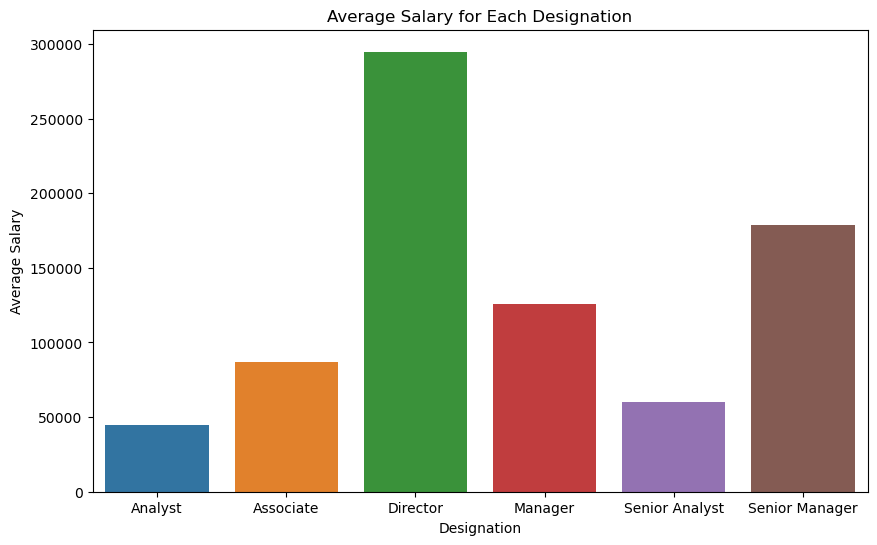

In [24]:
#plot a barplot for the average salaries of designation
plt.figure(figsize=(10, 6))
sns.barplot(x='DESIGNATION', y='SALARY', data=designation_salary)
plt.title('Average Salary for Each Designation')
plt.xlabel('Designation')
plt.ylabel('Average Salary')
plt.show()

In [25]:
# Filter data for Analysts
analyst_df = df[df['DESIGNATION'] == 'Analyst']

# Get salary values for analysts based on total experience
analyst_salary = analyst_df.groupby('Total_Experience')['SALARY'].mean()

# Print salary values for analysts based on total experience
print("Salary of Analysts Based on Total Experience:")
print(analyst_salary)

Salary of Analysts Based on Total Experience:
Total_Experience
0    43444.761905
1    44945.580435
2    45081.478049
3    45028.593830
4    45206.645570
Name: SALARY, dtype: float64


In [26]:
# Filter data for directors
director_df = df[df['DESIGNATION'] == 'Director']

# Get salary values for analysts based on total experience
director_salary = analyst_df.groupby('Total_Experience')['SALARY'].mean()

# Print salary values for analysts based on total experience
print("Salary of director Based on Total Experience:")
print(director_salary)

Salary of director Based on Total Experience:
Total_Experience
0    43444.761905
1    44945.580435
2    45081.478049
3    45028.593830
4    45206.645570
Name: SALARY, dtype: float64


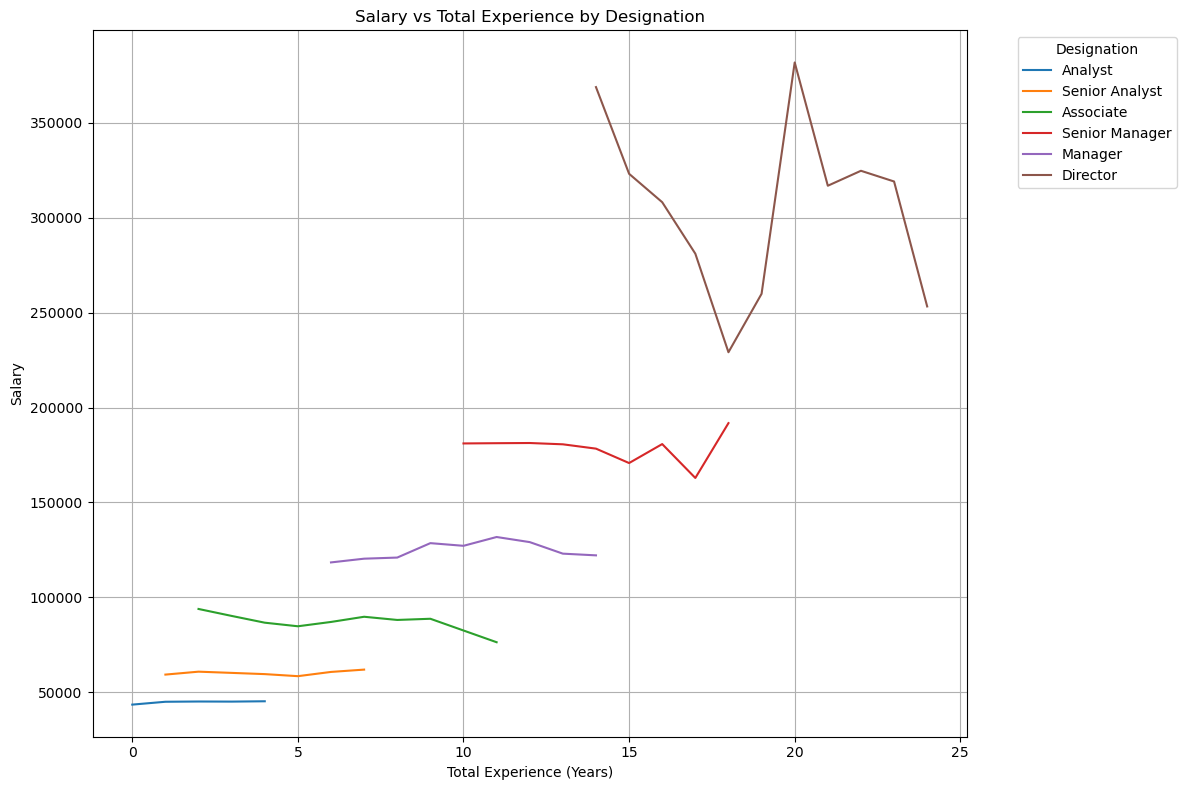

In [27]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Total_Experience', y='SALARY', hue='DESIGNATION', data=df, ci=None)
plt.title('Salary vs Total Experience by Designation')
plt.xlabel('Total Experience (Years)')
plt.ylabel('Salary')
plt.legend(title='Designation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Dropping the unncessary features

In [28]:
# Drop specified columns
df = df.drop(columns=['FIRST NAME', 'LAST NAME', 'DOJ', 'CURRENT DATE', 'LEAVES USED', 'LEAVES REMAINING','RATINGS','Experience'])
df.head()


,SEX,DESIGNATION,AGE,SALARY,UNIT,PAST EXP,Total_Experience,Performance_Score
0,F,Analyst,21.0,44570,Finance,0,1,2.0
2,F,Analyst,21.0,40955,Finance,0,1,3.0
3,F,Analyst,22.0,45550,IT,0,2,6.0
6,M,Analyst,22.0,40339,Marketing,0,2,10.0
8,F,Senior Analyst,28.0,63478,Operations,1,2,3.0


# Converting the categorical features to numbers

In [29]:
# Encode categorical variables
le = LabelEncoder()
df['SEX'] = le.fit_transform(df['SEX'])
df['DESIGNATION'] = le.fit_transform(df['DESIGNATION'])
df['UNIT'] = le.fit_transform(df['UNIT'])

In [30]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,PAST EXP,Total_Experience,Performance_Score
0,0,0,21.0,44570,0,0,1,2.0
2,0,0,21.0,40955,0,0,1,3.0
3,0,0,22.0,45550,1,0,2,6.0
6,1,0,22.0,40339,3,0,2,10.0
8,0,4,28.0,63478,4,1,2,3.0


In [31]:
df.describe()

,SEX,DESIGNATION,AGE,SALARY,UNIT,PAST EXP,Total_Experience,Performance_Score
count,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000
mean,0.491903,0.789474,24.725506,58055.764777,2.470445,1.555870,3.241700,5.882996
std,0.500036,1.526136,3.908838,36776.484770,1.707124,2.703656,3.052312,3.813769
min,0.000000,0.000000,21.000000,40001.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,43401.250000,1.000000,0.000000,2.000000,3.000000
50%,0.000000,0.000000,24.000000,46737.500000,2.000000,1.000000,2.000000,5.000000
75%,1.000000,1.000000,25.000000,50323.750000,4.000000,2.000000,3.000000,8.000000
max,1.000000,5.000000,45.000000,388112.000000,5.000000,23.000000,24.000000,30.000000


# creating input and output features

In [32]:
# Define features and target
X = df.drop(columns=['SALARY'])
y = df['SALARY']

In [33]:
# splitting of traing testing set into X and
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# STANDARDIZATION
scaler =StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

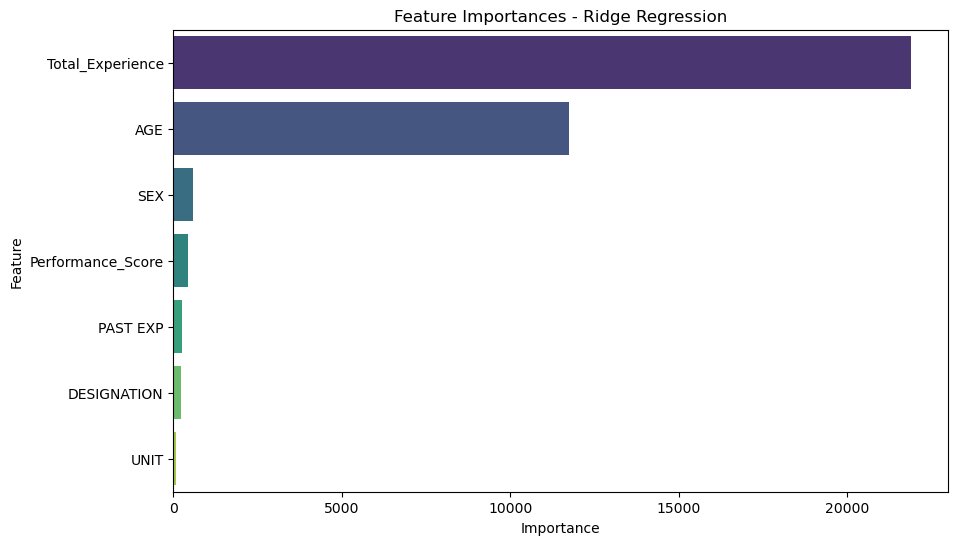

In [35]:
# Train a Ridge regression model (Ridge is used here to handle multicollinearity)
model = Ridge()
model.fit(X_train, y_train)

# Calculate feature importances
feature_importances = np.abs(model.coef_)
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances - Ridge Regression')
plt.show()

# Model Building

In [36]:
#Linear Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 302227769.3489816
Mean Absolute Error (MAE): 11139.017801032574
R-squared (R2) Score: 0.767251875062218
Root Mean Squared Error (RMSE): 17384.699288425487


In [37]:
#Ridge Regression
param_grid = {'alpha': [0.1, 1.0, 10.0],

              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}


rig = Ridge()
grid_search = GridSearchCV(rig, param_grid, scoring='r2', cv=10)

grid_search.fit(X_train, y_train)
best_ridge = grid_search.best_estimator_

y_pred = best_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 302283625.47004753
Mean Absolute Error (MAE): 11141.455484671145
R-squared (R2) Score: 0.7672088597976962
Root Mean Squared Error (RMSE): 17386.305687812106


In [38]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
rand_forest_model = RandomForestRegressor()
rand_forest_model.fit(X_train, y_train)
y_pred = rand_forest_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 77664628.92900449
Mean Absolute Error (MAE): 4470.253019180943
R-squared (R2) Score: 0.9401898217488356
Root Mean Squared Error (RMSE): 8812.753765367808


In [39]:
# Train a Support Vector Machine Regressor
svm_regressor = SVR()
svm_regressor.fit(X_train, y_train)

# Predict on test data
y_pred = svm_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 1426671339.4162116
Mean Absolute Error (MAE): 14656.791724153361
R-squared (R2) Score: -0.09869149306453706
Root Mean Squared Error (RMSE): 37771.30312044068


In [40]:
# Train a Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Predict on test data
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 171789685.31722674
Mean Absolute Error (MAE): 5830.386928860613
R-squared (R2) Score: 0.8677033310758846
Root Mean Squared Error (RMSE): 13106.856423919


In [41]:
# Initialize a list to store the metrics
metrics = []

# Define a function to evaluate the model and store the results
def evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    metrics.append([model_name, mse, mae, r2, rmse])

# Define the models to be evaluated
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Machine': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Ridge Regression': Ridge(),
    'Linear Regression': LinearRegression()
}

# Evaluate each model
for model_name, model in models.items():
    evaluate_model(model_name, model, X_train, y_train, X_test, y_test)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame(metrics, columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE'])


# Optional: Sort the DataFrame by a specific metric to find the best model
sorted_metrics_df = metrics_df.sort_values(by='R2', ascending=False)
print(sorted_metrics_df)


                    Model           MSE           MAE        R2          RMSE
2           Random Forest  7.855936e+07   4458.409565  0.939501   8863.372071
0           Decision Tree  1.699019e+08   5811.891315  0.869157  13034.640966
4       Linear Regression  3.022278e+08  11139.017801  0.767252  17384.699288
3        Ridge Regression  3.022836e+08  11141.455485  0.767209  17386.305688
1  Support Vector Machine  1.426671e+09  14656.791724 -0.098691  37771.303120


In [42]:
# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
rand_forest_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rand_forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rand_forest = grid_search.best_estimator_

# Predict on test data
y_test_pred = best_rand_forest.predict(X_test)

# Predict on train data
y_train_pred = best_rand_forest.predict(X_train)

# Evaluate the model on test data
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Test Data Evaluation:")
print("Mean Squared Error (MSE):", mse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("R-squared (R2) Score:", r2_test)
print("Root Mean Squared Error (RMSE):", rmse_test)

# Evaluate the model on train data
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print("\nTrain Data Evaluation:")
print("Mean Squared Error (MSE):", mse_train)
print("Mean Absolute Error (MAE):", mae_train)
print("R-squared (R2) Score:", r2_train)
print("Root Mean Squared Error (RMSE):", rmse_train)

Test Data Evaluation:
Mean Squared Error (MSE): 76067965.28313924
Mean Absolute Error (MAE): 4311.578862864199
R-squared (R2) Score: 0.9414194257343725
Root Mean Squared Error (RMSE): 8721.69509230512

Train Data Evaluation:
Mean Squared Error (MSE): 40504445.13348407
Mean Absolute Error (MAE): 3445.148964391101
R-squared (R2) Score: 0.9703331073721007
Root Mean Squared Error (RMSE): 6364.310263766536


In [43]:
best_rand_forest

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=42)

# Deployement code

In [46]:
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
df = pd.read_csv('Salary Prediction of Data Professions.csv')

# Drop rows with any missing values
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

# Convert 'DOJ' and 'CURRENT DATE' columns to datetime
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

# Calculate total experience in the company
df['Experience'] = (df['CURRENT DATE'] - df['DOJ']).dt.days // 365

# Calculate total experience
df['Total_Experience'] = df['PAST EXP'] + df['Experience']

# Calculate Performance Score
df['Performance_Score'] = df['RATINGS'] * df['Total_Experience']

# Drop specified columns
df = df.drop(columns=['FIRST NAME', 'LAST NAME', 'DOJ', 'CURRENT DATE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS','Experience'])

# Encode categorical variables
le = LabelEncoder()
df['SEX'] = le.fit_transform(df['SEX'])
df['DESIGNATION'] = le.fit_transform(df['DESIGNATION'])
df['UNIT'] = le.fit_transform(df['UNIT'])

# Define features and target
X = df.drop(columns=['SALARY'])
y = df['SALARY']

# Splitting of training and testing set into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Regressor model with best parameters
RFreg = RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                              n_estimators=200, random_state=42)
RFreg.fit(X_train_scaled, y_train)

# Streamlit app
st.title('Salary Prediction of Data Professionals')
st.write('This app predicts the salary of data professions based on input features.')

# Sidebar inputs
st.sidebar.header('Input Features')
sex = st.sidebar.slider('Sex', min_value=0, max_value=1)
Designation = st.sidebar.slider('Designation', min_value=0, max_value=5)
Age = st.sidebar.slider('Age', min_value=21, max_value=50)
Unit = st.sidebar.slider('Unit', min_value=0, max_value=5)
past_exp = st.sidebar.slider('Past Experience', min_value=0, max_value=30)
Total_exp = st.sidebar.slider('Total Experience', min_value=0, max_value=30)
Performance_score = st.sidebar.slider('Performance Score', min_value=0, max_value=30)

# Predict button
predict_button = st.sidebar.button('Predict')

# Check if the Predict button is clicked
if predict_button:
   # Create a dataframe with the selected input features
    input_data = pd.DataFrame({
        'SEX': [sex],
        'DESIGNATION': [Designation],
        'AGE':[Age],
        'UNIT': [Unit],
        'PAST EXP': [past_exp],
        'Total_Experience': [Total_exp],
        'Performance_Score': [Performance_score]
    })

    # Standardize the input data using the same scaler
    input_data_scaled = scaler.transform(input_data)

    # Predict salary
    prediction = RFreg.predict(input_data_scaled)

    # Display the prediction
    st.subheader('Salary Prediction')
    st.write(f'The predicted salary is ${prediction[0]:.2f}')